In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

In [4]:
data = fetch_20newsgroups()
type(data)

sklearn.utils.Bunch

In [6]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
categories = ['rec.sport.baseball', 'rec.sport.hockey', 'comp.graphics', 'alt.atheism', 'soc.religion.christian']

In [8]:
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [9]:
print(train.data[2])

From: thssccb@iitmax.iit.edu (catherine c bareiss)
Subject: Re: phone number of wycliffe translators UK
Organization: Illinois Institute of Technology
Lines: 36

In article <Apr.17.01.11.19.1993.2268@geneva.rutgers.edu> mprc@troi.cc.rochester.edu (M. Price) writes:
>
>  I'm concerned about a recent posting about WBT/SIL.  I thought they'd
>pretty much been denounced as a right-wing organization involved in
>ideological manipulation and cultural interference, including Vietnam
>and South America. A commission from Mexican Academia denounced them in
>1979 as " a covert political and ideological institution used by the
>U.S. govt as an instrument of control, regulation, penetration, espionage and
>repression."

I have personally know quite of few of the Wycliffe Bible Translators.
As an organization their fundamental purpose is to translate the scriptures
into the native languages which in terms usual means learning it and 
developing a written language (along with teaching the natives to

In [10]:
## Tfidf

In [11]:
## Converts the texts to vectors based on TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
## Brings in the Model we are going to be using - mn nb
from sklearn.naive_bayes import MultinomialNB
## creates a pipeline from the vectors created to the model
from sklearn.pipeline import make_pipeline

In [12]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [13]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [14]:
labels

array([4, 1, 0, ..., 3, 0, 4])

In [15]:
from sklearn.metrics import confusion_matrix

In [18]:
group_matrix = confusion_matrix(test.target, labels)

Text(91.68, 0.5, 'Predicted Label')

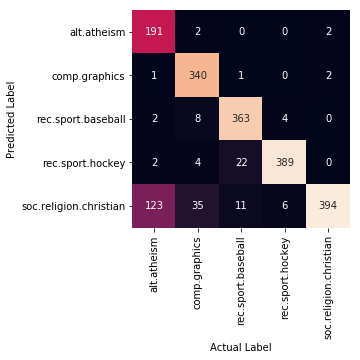

In [20]:
sns.heatmap(group_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

In [21]:
def predict_category(text, train=train, model=model):
    pred = model.predict([text])
    return train.target_names[pred[0]]

In [22]:
predict_category('god')

'soc.religion.christian'

In [23]:
predict_category('no god')

'soc.religion.christian'

In [24]:
predict_category('fast pitch')

'rec.sport.baseball'

In [25]:
predict_category('puck')

'rec.sport.hockey'